# Business Case: Aerofit

## Contents
**TODO**

## About
- Aerofit is a leading company in the field of fitness equipment.
- It's Product range includes machines such as treadmills, exercise bikes, gym equipment and fitness accessories.

## Business Problem

### Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation to the new customers.

#### Goals
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.



## Importing libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# loading the dataset.
df = pd.read_csv("aerofit_treadmill.csv")

## Observations

In [2]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape


(180, 9)

In [4]:
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### There are 9 features and 180 data points.

- These 9 features are:
    - Product
    - Age
    - Gender
    - Education
    - MaritalStatus
    - Usage
    - Fitness
    - Income
    - Miles

- Apart from Gender and MaritalStatus all other data is in Integer format.
- Gender and MaritalStatus are in Enum datatype G -> Male/Female, M.S -> Single/Partnered

#### Max,Min and Mean of some useful features.

**Age** -> min: 18.0, max: 50.0, mean: 28.7

**Usage** -> min: 2.0, max: 7.0, mean: 3.5

**Income** -> min: 29562, max: 104581, mean: 53720

**Miles** -> min: 21.0, max: 360.0, mean: 103.19

**Education** -> min: 12.0, max: 21.0, mean: 15.6
**Fitness** -> min: 1.0, max: 5.0, mean: 3.3

### Sales Analysis

         Percentage
Product            
KP281     44.444444
KP481     33.333333
KP781     22.222222


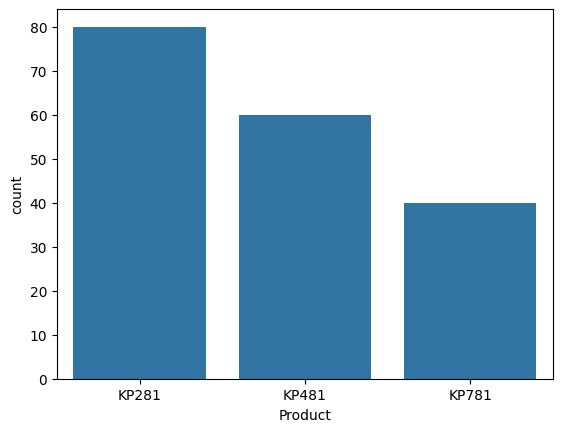

In [5]:
sns.countplot(data=df, x="Product")
crosstab = pd.crosstab(index=df["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### Product sales distribution.

- The above plot shows that the maximun no of sales was accieved for product KP281 with a 44% of sales.
- It was followed by KP481 with a 33% of sales
- And finally KP781 was with a 22% of sales.

**This concludes that more people bought KP281 which was the entry level product followed by KP481 and KP781 which are targetted at more advanced users.**

### Gender and MaritalStatus Analysis

        Percentage
Gender            
Female   42.222222
Male     57.777778


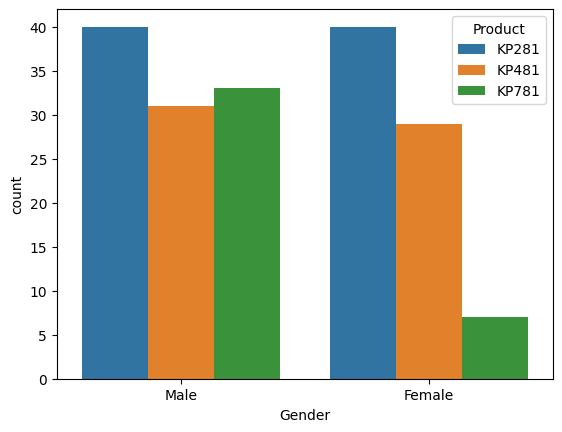

In [6]:
sns.countplot(data=df, x="Gender", hue="Product")

crosstab = pd.crosstab(index=df["Gender"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### Gender distribution.

- This shows that for beginner level treadmill(KP281) the number of both male and female buyers are equal.
- Although the numbers are little less from the KP281 for intermediate level treadmill(KP481) the number of both male and female buyers are equal.
- For the advanced level treadmill(KP781) we can see that the trend is not same as before as the numbers of male buyers has increasaed while the number of female buyers has dropped significantly.

**This shows that more males are buying treadmills with around 57.7% of all the users being male.Whereas female buyers are also near around the with around 42.2 % users.**

               Percentage
MaritalStatus            
Partnered       59.444444
Single          40.555556


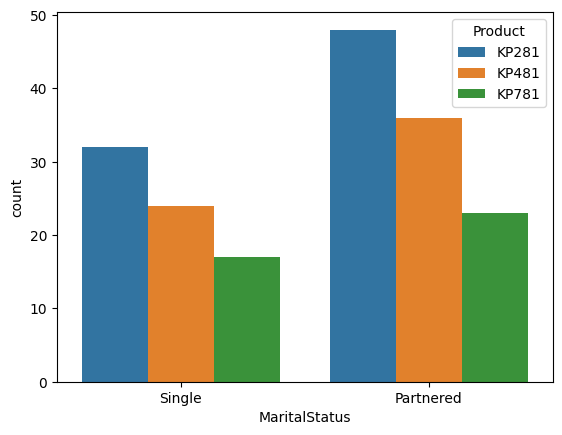

In [7]:
sns.countplot(data=df, x="MaritalStatus", hue="Product")

crosstab = pd.crosstab(index=df["MaritalStatus"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### MaritalStatus distribution

- For beginner level treadmill(KP281) more partnered buyers are there with a significant difference.
- For intermediate level treadmill(KP481) also partnered buyers are more but the difference is not much.
- For advanced level treadmill(KP781) the number of both Single and Partnered users are almost equal with partnered users being just a little bit more than single.

**This shows that there are around 59.4% Partnered buyers and 40.5% Single buyers.**

### Age Analysis

<Axes: xlabel='Age', ylabel='Count'>

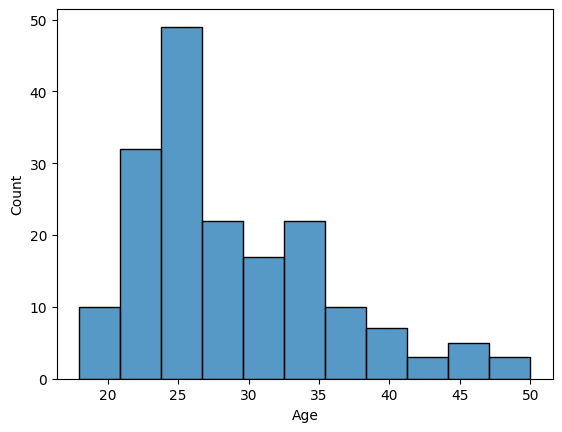

In [8]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='Age', ylabel='Product'>

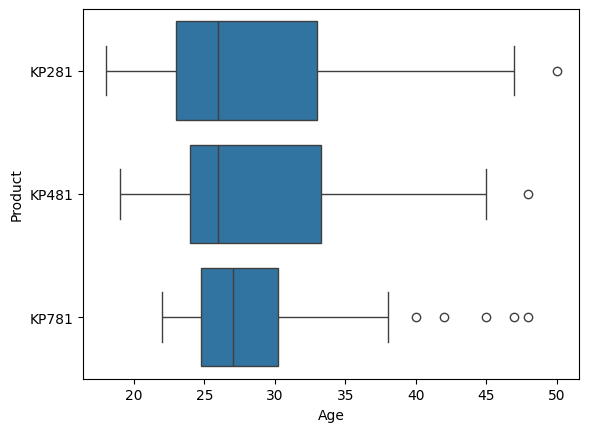

In [9]:
sns.boxplot(data=df, x="Age", y="Product")

#### Age distribution of the customers

- More users are in the age group of 18-28 which tells that young people tend to be more health conscious.
- There is a significant drop in sales when we go to the 28-38 age group which tells that people being more busy in this age group are less likely to be more health conscious.
- This trend continuous for the age group of 38-48.
- There are very less members in the age group of 48-60 which tells us that even in this age group some people are there who are health conscious.

**This concludes that young users are more health conscious and hence are the majority of the customers and the falling trend shows that with increase in age customers are less health conscious maybe due to more busy lifestyle and workload.**

**Outliers**

- For KP281 there is only 1 outlier.
- For KP481 there is only 1 outlier.
- For KP781 there are about 5 outliers.

### Income Analysis.

<Axes: xlabel='Income', ylabel='Count'>

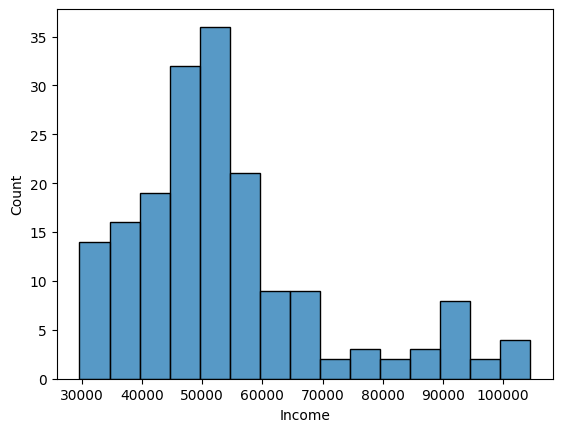

In [10]:
sns.histplot(data=df, x="Income")

In [11]:
crosstab = pd.crosstab(index=df[df["Income"]> df["Income"].mean() ]["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

         Percentage
Product            
KP281     28.571429
KP481     20.634921
KP781     50.793651


<Axes: xlabel='Income', ylabel='Product'>

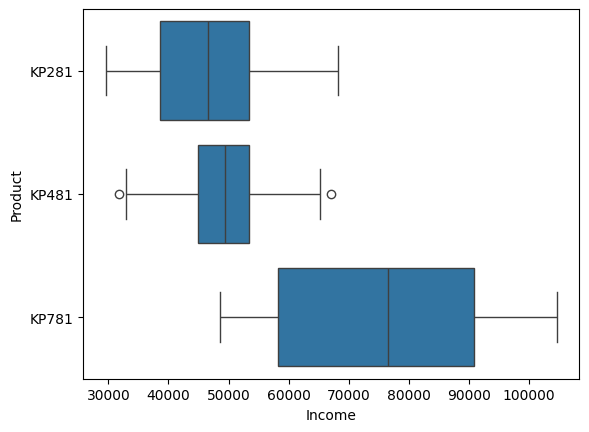

In [12]:
sns.boxplot(data=df, x="Income", y="Product")

#### Income distribution.

- The above plots shows us that majority of buyers have an income of between 40000 and 60000.

- We can also observe that quantity of people with low income are more, we can draw from this that high income people tend to do more work hence are relatively busier than others and do not have time to invest on fitness,

- From the boxplot we can observe that 75th percentile of buyers of KP281 have an income of below 55,000, for KP481 this number is more or less same but here we see that the 25th percentile user earns around 45,000 which is way higher than 25th percentile of KP281's Income.

- But we can observe that the median Income of both KP281's and KP481's customer is almost same.

- The users of KP781 are having very high income with relation to others. 75th percentile of the buyers of KP781 are having an Income of 92,000 which is way higher than 75th percentile of KP281's and KP481's Income. along with it the 25th percentile Income of these buyers is around 58,000 and the median salary is around 78,000.

- This shows that for the beginner and intermediate level treadmill which are priced lower more people with less Income are tend to buy those. Whereas we can see that people with high Income are most likely to buy the advanced level treadmill

- Most of the users who have a Income greater than the mean income are most likely to buy the advanced level treadmill.

**This concludes that although people with high income are spending a lot on the advanced level treadmill the number of such people is less as compared to people who are willing to buy the intermediate and beginner level treadmills and hence the revenue proportion is almost equally distributed between these**

**Outliers**

- For KP481 there are 2 outliers.
- Other products do not have any outlier for Income.

### Education Analysis.

<Axes: xlabel='Education', ylabel='count'>

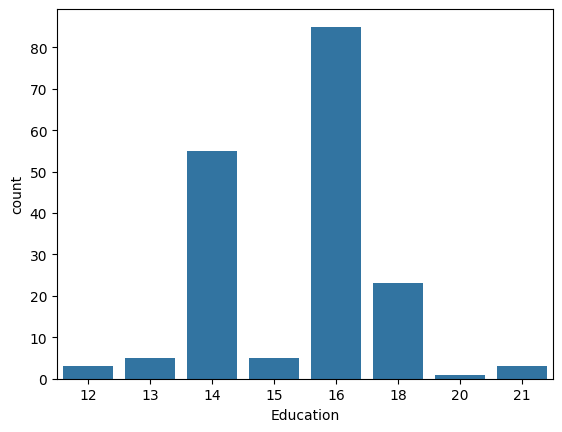

In [13]:
sns.countplot(data=df, x="Education")

<Axes: xlabel='Education', ylabel='Product'>

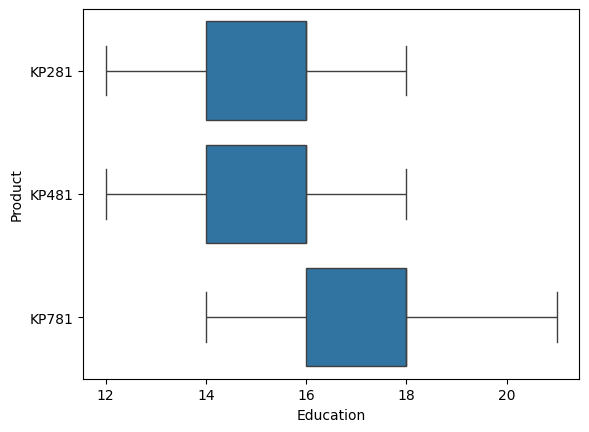

In [14]:
sns.boxplot(data=df, x="Education",y="Product")

#### Education distribution.

- The above plots show that people with a higher education are more likely to buy a treadmill and we can conclude that it is because people with high educaton have more alligned towards health and fitness.

**From the boxplot we can observe a common fact that the people with high education are more likely to buy a treadmill**

**Outliers**

- There are no outliers Present.

### Fitness Analysis.

<Axes: xlabel='Fitness', ylabel='Count'>

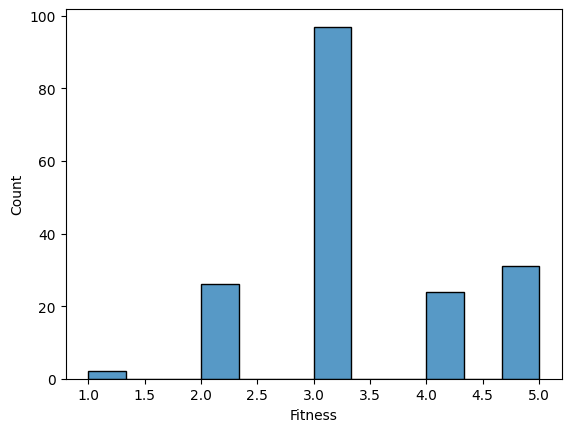

In [15]:
sns.histplot(data=df, x="Fitness")

### Usage Analysis

<Axes: xlabel='Usage', ylabel='Count'>

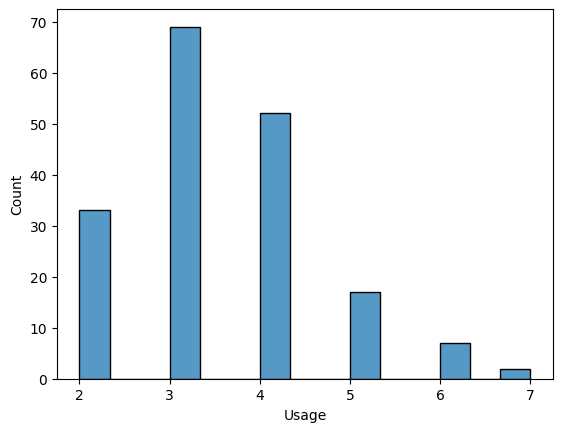

In [16]:
sns.histplot(data=df, x="Usage")

### Miles Analysis

<Axes: xlabel='Miles', ylabel='Count'>

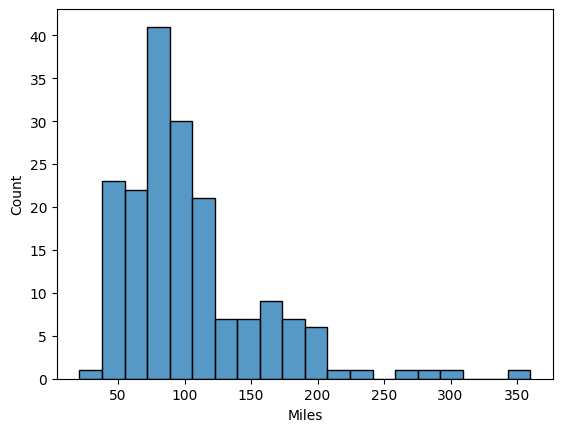

In [17]:
sns.histplot(data=df, x="Miles")

## Corellations